# Integrted project №1

## What patterns are determined the success of game

### Project Description

Strimchik is an online store, which sells computer games all over the world. From open sources, historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available. You need to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

### Step 1. Open File and Study Data

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Conclusion: 
There are in the  table 16715 lines is presented, which contains information about computer games, their rating and sales around the world. 
There are missing values. A lot of values numbers  are missing in the score and rating information column (Critic_Score, User_Score, Rating). The main reason may be that   the customer didn't rate the game in the online store.  

### Step 2. Prepare Data for Analysis

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df['name'].isnull().sum()


2

In [7]:
df.dropna(subset=['name'], inplace=True)

Let's check the missing values by the year released:

In [8]:
df.loc[df['year_of_release'].isnull(),'name'].value_counts()

LEGO Harry Potter: Years 5-7    7
Rock Band                       4
Happy Feet Two                  4
Bejeweled 3                     3
Test Drive Unlimited 2          3
                               ..
Teen Titans                     1
Drill Dozer                     1
Madden NFL 2002                 1
McFarlane's Evil Prophecy       1
Madden NFL 11                   1
Name: name, Length: 232, dtype: int64

In [9]:
mean_year_of_release = df.groupby('name')['year_of_release'].mean()
print(mean_year_of_release)

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006         NaN
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: float64


We have missing values in the columns with the release year of the game. To process them, let's group the data by the name of the game and the year of release, and then fill in the gaps with the median.

Since the release of games for different platforms occurs approximately in the same year, I replace the missing values with an mean values.
The missing values in the year of issue column could have been left blank at all, due to the lack of information, but in this case, I decided to use the method of filling in the missing values on the grouping and mean value.


In [10]:
df['year_of_release'] = df.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.mean()))
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].mean())

In [11]:
df['year_of_release'].isnull().sum()

0

Let's take a look at the data types:

In [12]:
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


We change data types in: 

- year_of_release(float —  int)
- user_score (object — float)

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int') 

Let's take a closer look at the user_score column

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
df['user_score'].isnull().sum()

6699

Among the data, there is the value 'tbd', which means to be determined. This means there are not enough reviews to rate the game. We could replace this value with Nan, but then we could not further analyze the data. Therefore, we will replace the value of 'tbd' with '-1' (it cannot replace it with 0, because in this case the data will be invalid and it will turn out that the rating of the game is assessed as 0. 

In [16]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [17]:
df['user_score'].isnull().sum()

9123

 ##### critic_score column 

In [18]:
df['critic_score'].isnull().sum()

8576

In [19]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
df['rating'] = df['rating'].replace(np.NaN, 'unknown')

Let's create an additional column and calculate the total sales in all regions:

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [22]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


### Step 3.Data Analysis

In [23]:
df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

,total_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


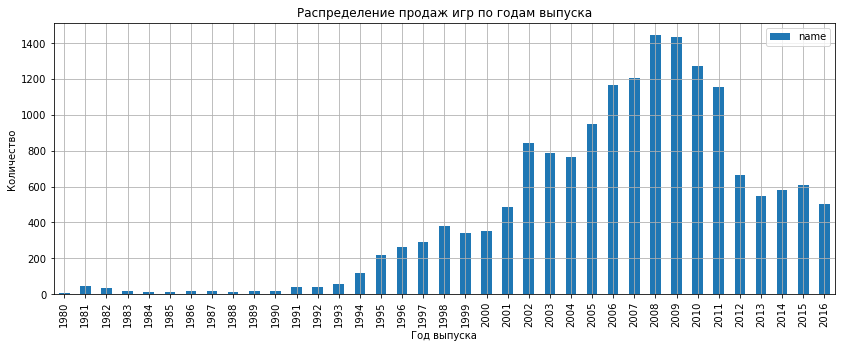

In [24]:
(df
     .pivot_table(index='year_of_release', values='name',aggfunc='count')
     .plot(kind='bar',grid=True, figsize=(14, 5)))
plt.title('Распределение продаж игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

In [25]:
df = df[df['year_of_release']>1994]

See how platform sales have changed.Select the platforms with the highest total sales and build the distribution by year. 
How long do new platforms appear and old platforms disappear? 

In [26]:
platforms= pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False).reset_index().head(10)
platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.10
5,PS,724.83
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,3DS,259.00


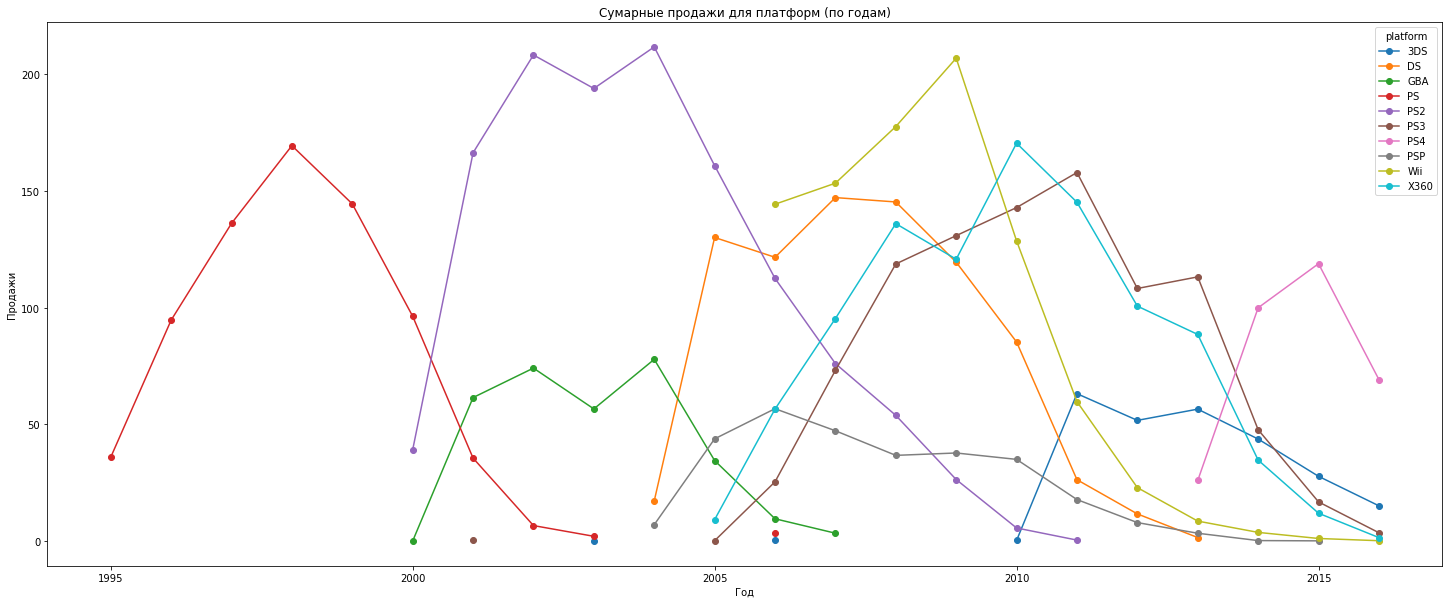

In [27]:
platforms_types = platforms['platform'].to_list() 
df.query('platform==@platforms_types').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(style='-o', figsize = (25,10))
plt.title('Сумарные продажи для платформ (по годам)')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Life cycle of platforms: 

In [28]:
platf = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') 
platf .fillna(0, inplace=True)

In [29]:
life_cycle =[]
for platform in platf.columns:
    life_cycle.append(platf[platform].ne(0).value_counts().loc[platf[platform].ne(0).value_counts().index == True].values[0])



life_cycle = pd.DataFrame(life_cycle, columns=['active_years'])
life_cycle.describe()

,active_years
count,27.000000
mean,7.370370
std,4.740563
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,22.000000


The "average lifespan" of the platform is 7 years

Now let's take the data for the current period and clarify which platforms are leading in terms of sales, growing or falling? Let's choose several profitable platforms.

The most popular platforms today (PS4 and XOne). Both consoles were released at the end of 2013, so we will use data from 2014.

In [30]:
currently = df[df['year_of_release']>2013]

The most popular platforms for the specified period and total sales by year:

In [31]:
currently.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False).reset_index()

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [32]:
currently.pivot_table(index='year_of_release', values='total_sales',columns='platform',aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


##### Graphs for the period 2014 - 2016

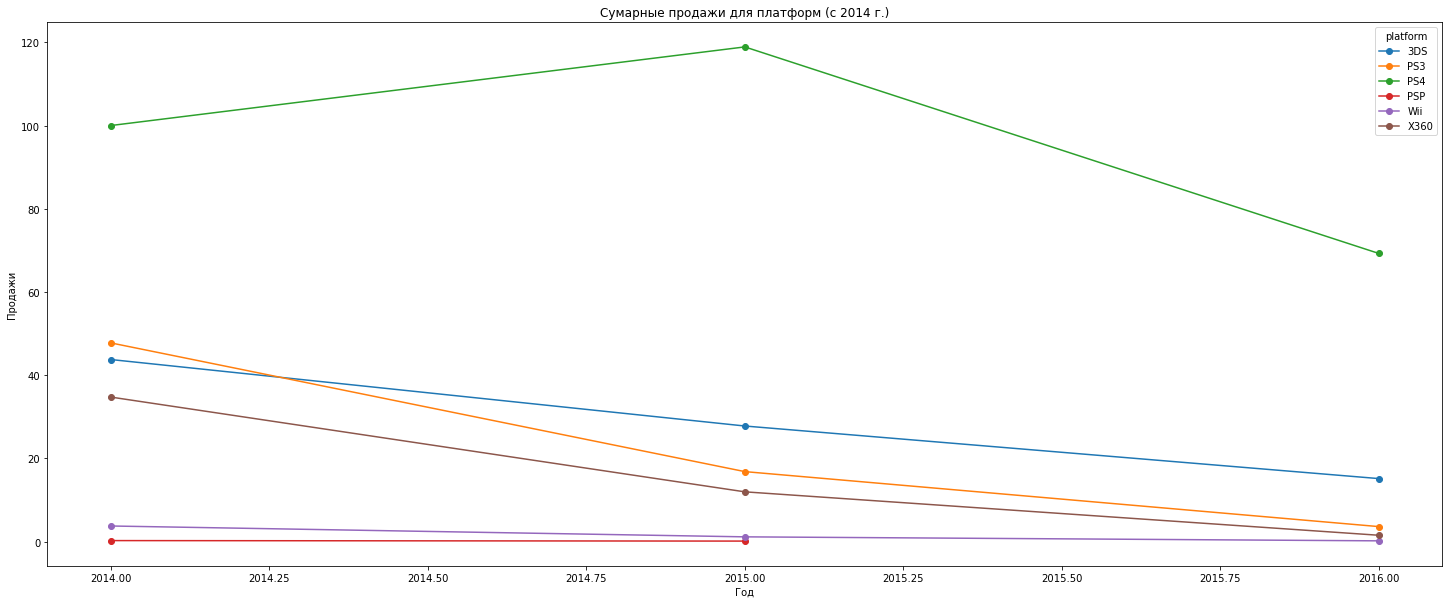

In [33]:
platforms_types = platforms['platform'].to_list() 
currently.query('platform==@platforms_types').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(style='-o', figsize = (25,10))
plt.title('Сумарные продажи для платформ (с 2014 г.)')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

PS4 is the most popular platform for all the periods reviewed. Next popular platform is XOne.

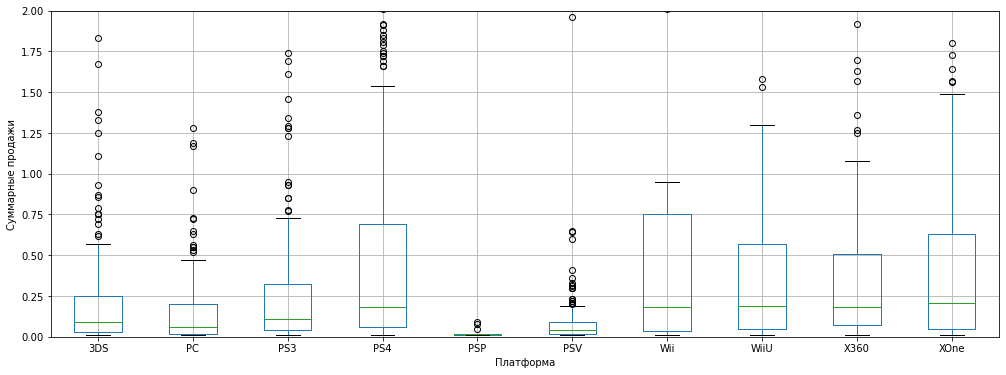

In [34]:
fig, ax = plt.subplots(figsize = (17,6))
currently.pivot_table(index = 'name', columns = 'platform', values = 'total_sales').boxplot(ax=ax, grid = True)

ax.set_ylim(0,2)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

The Box Plot shows that the platform is leading in value: XOne, Wii, PS4.
The average for the leading platforms is estimated to be between 0.22 and 0.24. The maximum PS4 sales limit is 1.52, the XOne is 1.5.

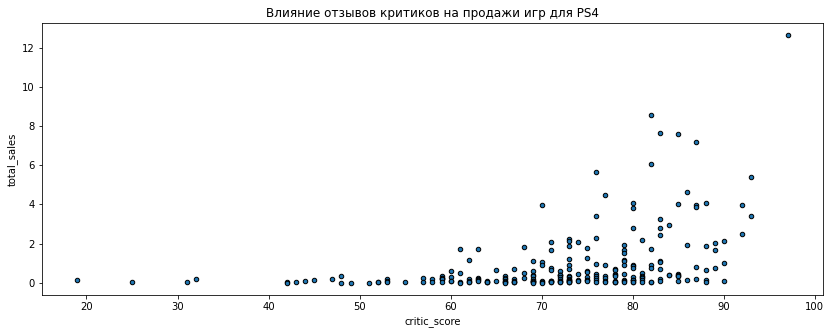

In [35]:
currently.query('(platform=="PS4")&(critic_score>0)').plot(x='critic_score', y='total_sales', kind='scatter', ec='black',figsize=(14,5),title='Влияние отзывов критиков на продажи игр для PS4') 
plt.show()

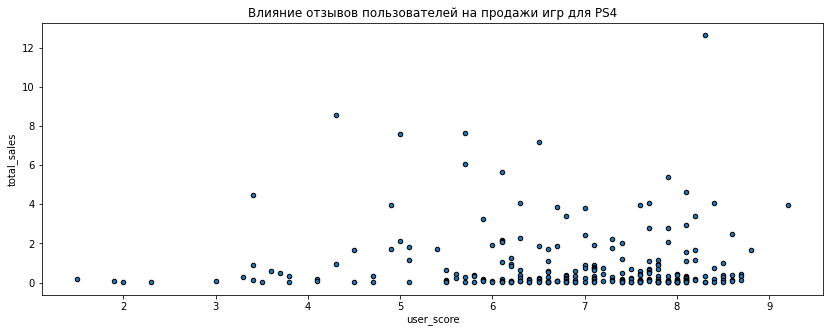

In [36]:
currently.query('(platform=="PS4")&(user_score>0)').plot(x='user_score', y='total_sales', kind='scatter', ec='black',figsize=(14,5),title='Влияние отзывов пользователей на продажи игр для PS4') 
plt.show()

Let's calculate the correlation for metrics (critics' score, user scores).

In [37]:
corr_score = currently.query('(platform=="PS4")&(critic_score>0)&(user_score>0)')

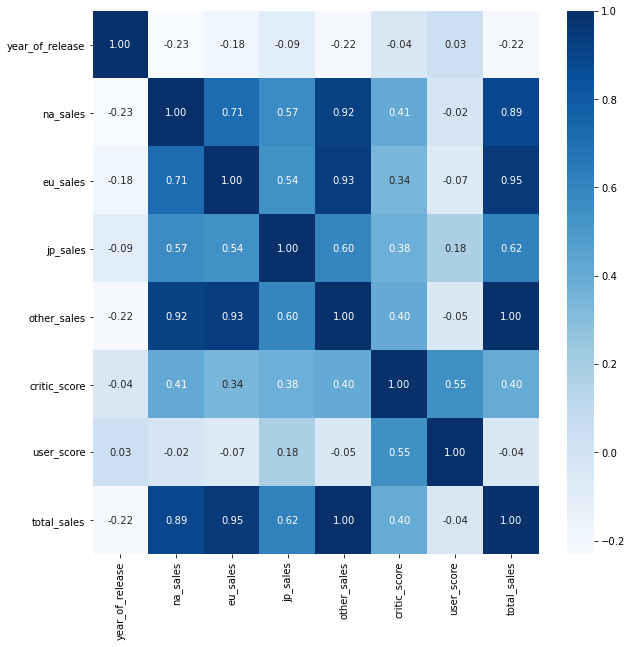

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_score.corr(), annot=True, cmap="Blues", fmt='.2f')  
plt.show()

In [39]:
corr_score_filt = currently[['total_sales' ,'critic_score', 'user_score']]

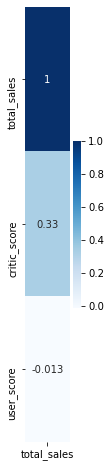

In [40]:
plt.figure(figsize=(1,8))
sns.heatmap(corr_score_filt.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':10})

Critics' ratings influence sales the most.

As an example, consider the leaders (top 5, excluding PS4) from our table:
     
1. XOne	
2. 3DS	
3. PS3	
4. X360	
5. WiiU	


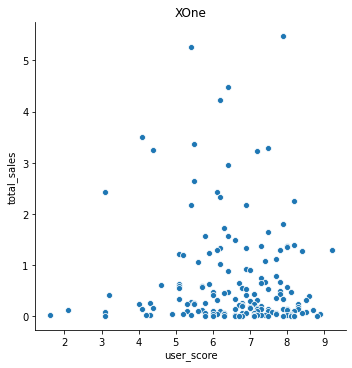

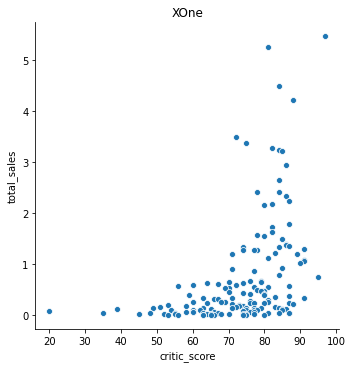

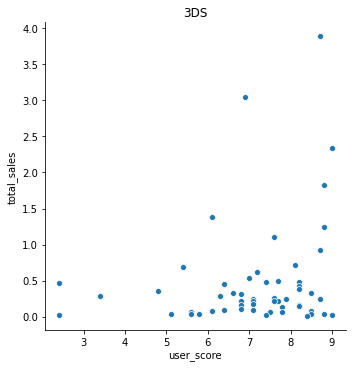

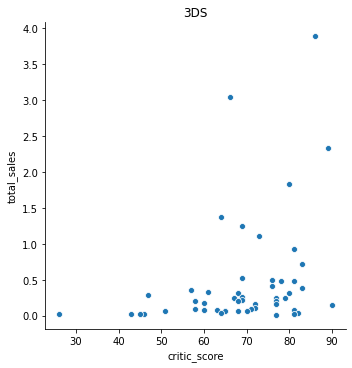

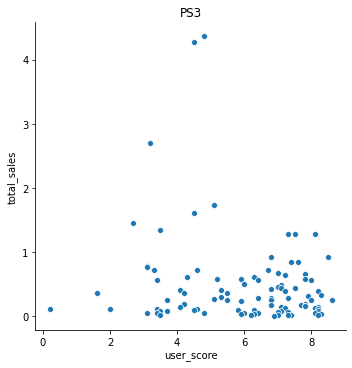

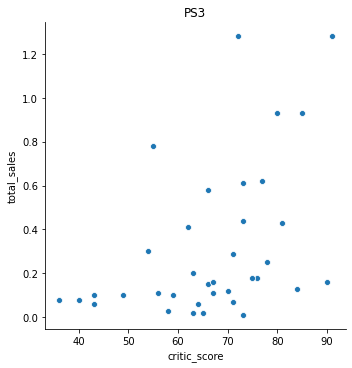

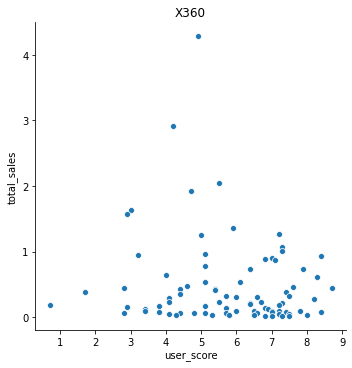

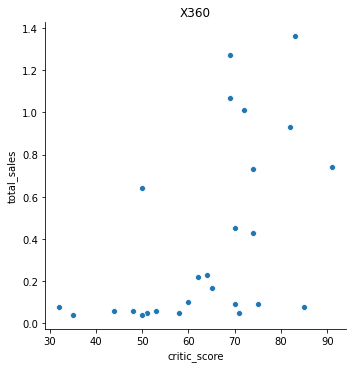

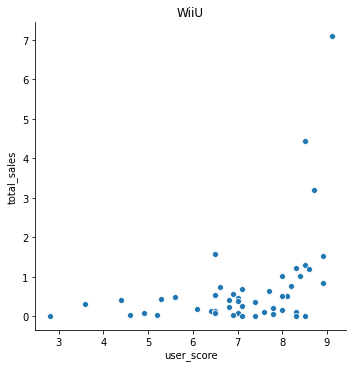

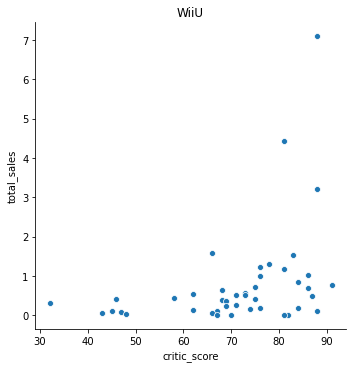

In [41]:
for platform in ['XOne','3DS', 'PS3', 'X360', 'WiiU']:
    for column in ['user_score', 'critic_score']:
        temp = currently.query('platform == @platform')
        sns.relplot(x=column, y="total_sales", data=temp)
        _ = plt.title(platform)

In [42]:
for platform in ['XOne','3DS', 'PS3', 'X360', 'WiiU']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = currently.query('platform == @platform')
        print('Correlation coefficient {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))



XOne:
Correlation coefficient user_score и total_sales: -0.07
Correlation coefficient critic_score и total_sales: 0.43

3DS:
Correlation coefficient user_score и total_sales: 0.22
Correlation coefficient critic_score и total_sales: 0.31

PS3:
Correlation coefficient user_score и total_sales: -0.17
Correlation coefficient critic_score и total_sales: 0.45

X360:
Correlation coefficient user_score и total_sales: -0.14
Correlation coefficient critic_score и total_sales: 0.53

WiiU:
Correlation coefficient user_score и total_sales: 0.41
Correlation coefficient critic_score и total_sales: 0.37


For other platforms, it is similar to the conclusions on the PS4 platform. User reviews are not for sales. Critical reviews correlate more with sales than user reviews.
    
There is an exception: this is the WiiU platform, where user reviews are slightly more correlated with sales than critics. Also, for the 3DS platform, the correlation coefficient turned out to be the same, but the correlation is weak.



Let's look high and low selling genres.

In [43]:
(currently
     .pivot_table(index='genre',values='total_sales',aggfunc='sum')
     .sort_values('total_sales',ascending=False)
)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


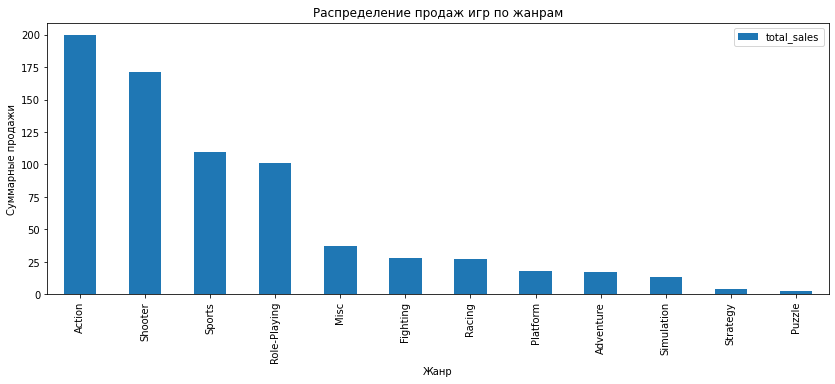

In [44]:
(currently
     .pivot_table(index='genre',values='total_sales',aggfunc='sum')
     .sort_values('total_sales',ascending=False)
     .plot(kind='bar',figsize=(14,5),title='Распределение продаж игр по жанрам')
     
)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

The most popular genres are Action, Shooter, and Sports. These genres of games are both the most expensive and the most popular.
Low profit genres: Puzzle and Strategy. 

In [45]:
top = currently.pivot_table(index='genre', values='total_sales',aggfunc=('count', 'mean', 'median')).sort_values(('count'),ascending=False).head(10)
top

,count,mean,median
genre,,,
Action,619,0.322068,0.090
Role-Playing,221,0.459005,0.110
Adventure,185,0.094865,0.030
Sports,161,0.680000,0.180
Shooter,128,1.335469,0.515
Misc,113,0.332301,0.090
Racing,69,0.398841,0.090
Fighting,60,0.470333,0.125
Simulation,44,0.298409,0.100


### Step 4. User portrait of each region 

### Most Popular Platforms (Top 5) 

In [46]:
def top5_in_regions(groupby, region_sales, ax):
    pivot = currently.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': 'pink', 'eu_sales': 'lightgreen', 'jp_sales': 'lightblue'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales],rot=0)
    plot.legend(prop={'size':16})
    plot.set_xlabel('')
    plot.title.set_size(20)

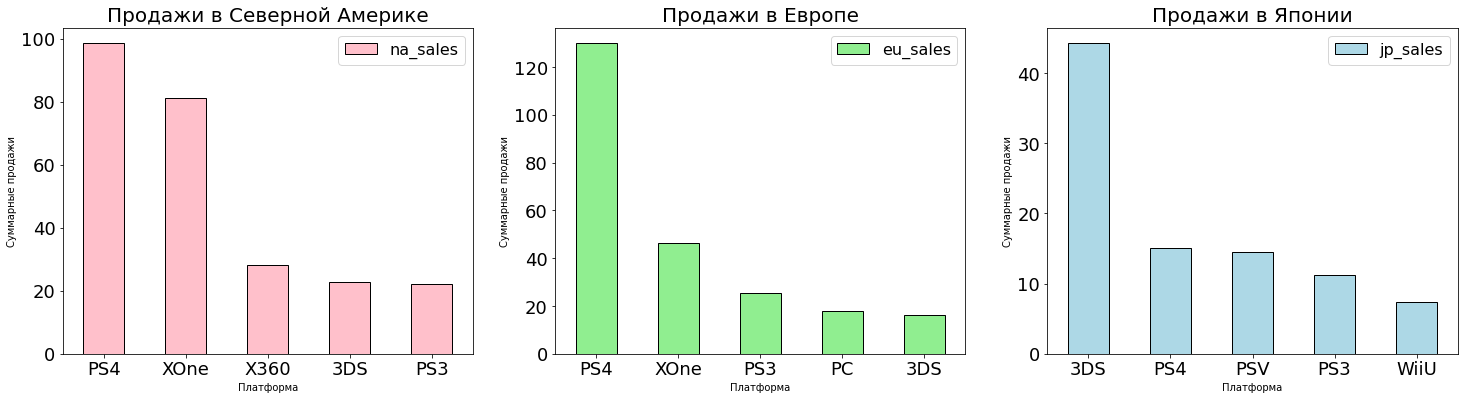

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
top5_in_regions('platform', 'na_sales', 0)
top5_in_regions('platform', 'eu_sales', 1)
top5_in_regions('platform', 'jp_sales', 2) 
for ax in axes:
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Суммарные продажи')


We can see that PS4 is the leading platform for Europe and North America. The second is XOne, the third is X360 and PS3.
For Japan, the most popular platforms are 3DS, PS4.

Share of sales for North America: 

In [48]:
data_pivot_na = currently.pivot_table(index = ['platform'], values = ['na_sales'], aggfunc = 'sum')
data_pivot_na
data_pivot_na['ratio'] = round(data_pivot_na['na_sales'] / data_pivot_na['na_sales'].sum() , 2)
data_pivot_na.sort_values('ratio', ascending = False).head(5)

,na_sales,ratio
platform,,
PS4,98.61,0.35
XOne,81.27,0.29
X360,28.30,0.10
3DS,22.64,0.08
PS3,22.05,0.08


Share of sales for Europa:

In [49]:
data_pivot_eu = currently.pivot_table(index = ['platform'], values = ['eu_sales'], aggfunc = 'sum')
data_pivot_eu
data_pivot_eu['ratio'] = round(data_pivot_eu['eu_sales'] / data_pivot_eu['eu_sales'].sum() , 2)
data_pivot_eu.sort_values('ratio', ascending = False).head(5)

,eu_sales,ratio
platform,,
PS4,130.04,0.48
XOne,46.25,0.17
PS3,25.54,0.09
PC,17.97,0.07
3DS,16.12,0.06


Share of sales for Japan: 

In [50]:
data_pivot_jp = currently.pivot_table(index = ['platform'], values = ['jp_sales'], aggfunc = 'sum')
data_pivot_jp
data_pivot_jp['ratio'] = round(data_pivot_jp['jp_sales'] / data_pivot_jp['jp_sales'].sum() , 2)
data_pivot_jp.sort_values('ratio', ascending = False).head(5)

,jp_sales,ratio
platform,,
3DS,44.24,0.48
PS4,15.02,0.16
PSV,14.54,0.16
PS3,11.22,0.12
WiiU,7.31,0.08


### Most Popular Genres (Top 5) 

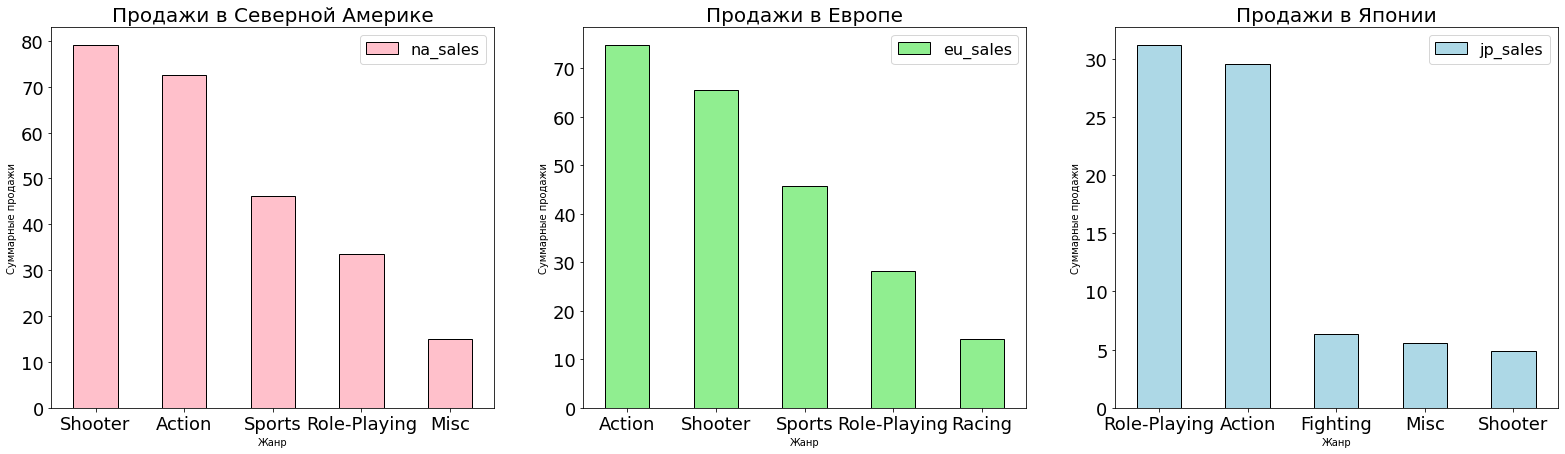

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

top5_in_regions('genre', 'na_sales', 0)
top5_in_regions('genre', 'eu_sales', 1)
top5_in_regions('genre', 'jp_sales', 2) 
for ax in axes:
    ax.set_xlabel('Жанр')
    ax.set_ylabel('Суммарные продажи')

In North America in the first place in the Shooter genre, in the second place in Action. Action and Shooter are leading in Europe.
For Japan, Role-Playing and Action were the most preferred genres.

Let's check if the ESRB rating affects sales in a particular region. To do this, we will build charts and calculate sales and their share in accordance with the rating of games.

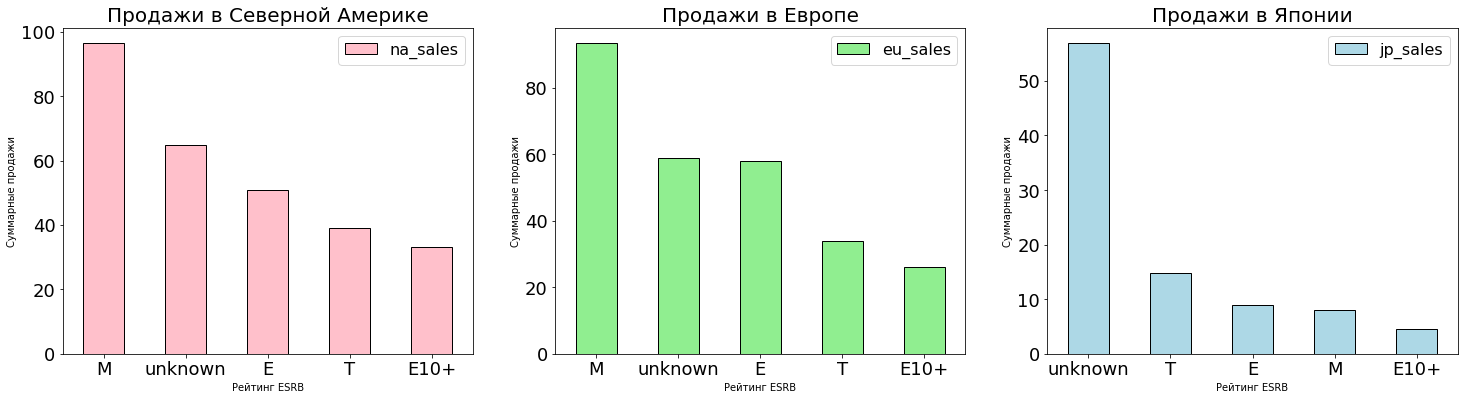

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top5_in_regions('rating', 'na_sales', 0)
top5_in_regions('rating', 'eu_sales', 1)
top5_in_regions('rating', 'jp_sales', 2) 
for ax in axes:
    ax.set_xlabel('Рейтинг ESRB')
    ax.set_ylabel('Суммарные продажи')

In [53]:
data_pivot_jp = currently.pivot_table(index = ['rating'], values = ['jp_sales'], aggfunc = 'sum')
data_pivot_jp
data_pivot_jp['ratio'] = round(data_pivot_jp['jp_sales'] / data_pivot_jp['jp_sales'].sum() , 2)
data_pivot_jp.sort_values('ratio', ascending = False)

,jp_sales,ratio
rating,,
unknown,56.90,0.61
T,14.78,0.16
E,8.94,0.10
M,8.01,0.09
E10+,4.46,0.05


In [54]:
data_pivot_na = currently.pivot_table(index = ['rating'], values = ['na_sales'], aggfunc = 'sum')
data_pivot_na
data_pivot_na['ratio'] = round(data_pivot_na['na_sales'] / data_pivot_na['na_sales'].sum() , 2)
data_pivot_na.sort_values('ratio', ascending = False)

,na_sales,ratio
rating,,
M,96.42,0.34
unknown,64.72,0.23
E,50.74,0.18
T,38.95,0.14
E10+,33.23,0.12


In [55]:
data_pivot_eu = currently.pivot_table(index = ['rating'], values = ['eu_sales'], aggfunc = 'sum')
data_pivot_eu
data_pivot_eu['ratio'] = round(data_pivot_eu['eu_sales'] / data_pivot_eu['eu_sales'].sum() , 2)
data_pivot_eu.sort_values('ratio', ascending = False)

,eu_sales,ratio
rating,,
M,93.44,0.35
unknown,58.95,0.22
E,58.06,0.21
T,34.07,0.13
E10+,26.16,0.10


In America and Europe, the most popular games are for category 17+. In second place are games for all ages and games for teenagers from 13 years old.
In Japan, games for teenagers and games for any age category are more popular, but games for teenagers from 17 years old and adults are only in third place.

### Step 5. Hypothesis Testing

#### Hypothesis 1 

Hypothesis:

- H₀ Average user ratings for Xbox One and PC platforms are the same.
- H₁ Average user ratings for Xbox One and PC platforms differ.

In [56]:
x = currently[currently['platform'] == 'PC']['user_score']
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

2.9011543151334522


In [57]:
x = currently[currently['platform'] == 'XOne']['user_score']
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

1.8910066518846989


We use scipy.stats.ttest_ind method because the variances of the samples are different.
Let's set the critical significance level to 0.05 so that the hypothesis probability is 95% or more.

In [58]:
currently_PC = currently[(currently['user_score']>0)&(currently['platform']=='PC')]
currently_XOne = currently[(currently['user_score']>0)&(currently['platform']=='XOne')] 
alpha = .05
results = st.ttest_ind(
    currently_PC['user_score'], 
    currently_XOne['user_score'],
    equal_var=False
    )

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.11601398086668827
Failed to reject the null hypothesis


H₀ null hypothesis: Average user ratings for Xbox One and PC platforms are the same - confirmed

#### Hypothesis 2


- H₀ The average user ratings for the Action and Sports genres are the same.
- H₁ Average user ratings for Action and Sports genres differ.

In [59]:
x = currently[currently['genre'] == 'Action']['user_score']
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

1.898476658476659


In [60]:
x = currently[currently['genre'] == 'Sports']['user_score']
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

3.4469791276090476


In [61]:
currently_Action = currently[(currently['user_score']>0)&(currently['genre']=='Action')]
currently_Sports = currently[(currently['user_score']>0)&(currently['genre']=='Sports')]

alpha = .05
results = st.ttest_ind(
    currently_Action['user_score'], 
    currently_Sports['user_score'],
    equal_var=False
    )

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 1.1825550382644557e-14
Reject the null hypothesis


Alternative hypothesis H₁: Average user ratings for Action and Sports genres are different - confirmed

# Final Conclusions

We have done data analysis for gaming platforms starting in 2014. The most popular platforms for Europe and North America (NA) were the PS4, and XOne, Japan's portable 3DS.

On average, a platform's life cycle is 7 years, after which new platforms appear and replace old users, update the console to the latest versions.

Users from all over the world prefer different game genres, while Action Schooter genres are popular in Europe and NA, Role-Playing and Action are preferred in Japan.

ESRB rating, the European and North American market prefers games in the 17+ category, while the Japanese market is dominated by games for teenagers 13 and older.

Impact of user ratings on sales: you shouldn't be guided by them, they don't have a big impact. It's the same with the critics' ratings: they don't have a strong impact on the sale.

###### Recommendations for an advertising campaign: 

For each region, it is worth promoting the game for the platform that is most popular. For Europe and NA, these are PS4 games, and XOne, for Japan, 3DS games.

Also focus on the tastes of users, and for Japan to offer more games of the Role-Playing and Action genres, perhaps more emphasis on the Action genre to bring it to the first place, as is the case in NA and Europe.

To attract more users and increase sales among existing ones, it is worth paying more attention to games of the age category 17+, as a rule, these games will not only be played by users of this age category, but also younger ones. Most likely, they make up the majority of the user market.